In [169]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [170]:
flights = pd.read_csv("FlightDelays.csv")

len(flights)

103361

In [171]:
flights.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [172]:
flights.info()

flights["carrier"] = flights["carrier"].astype("category")
flights["carrier_name"] = flights["carrier_name"].astype("category")
flights["airport"] = flights["airport"].astype("category")
flights["airport_name"] = flights["airport_name"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103361 entries, 0 to 103360
Data columns (total 22 columns):
year                   103361 non-null int64
 month                 103361 non-null int64
carrier                103361 non-null object
carrier_name           103361 non-null object
airport                103361 non-null object
airport_name           103361 non-null object
arr_flights            103240 non-null float64
arr_del15              103220 non-null float64
carrier_ct             103240 non-null float64
 weather_ct            103240 non-null float64
nas_ct                 103240 non-null float64
security_ct            103240 non-null float64
late_aircraft_ct       103240 non-null float64
arr_cancelled          103240 non-null float64
arr_diverted           103240 non-null float64
 arr_delay             103240 non-null float64
 carrier_delay         103240 non-null float64
weather_delay          103240 non-null float64
nas_delay              103240 non-null float64
secu

In [173]:
#flights.drop([' arr_delay'], axis=1, inplace=True)
#flights.drop([' carrier_delay'], axis=1, inplace=True)
#flights.drop(['weather_delay'], axis=1, inplace=True)
#flights.drop(['nas_delay'], axis=1, inplace=True)
#flights.drop(['security_delay'], axis=1, inplace=True)
#flights.drop(['late_aircraft_delay'], axis=1, inplace=True)

In [174]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103361 entries, 0 to 103360
Data columns (total 22 columns):
year                   103361 non-null int64
 month                 103361 non-null int64
carrier                103361 non-null category
carrier_name           103361 non-null category
airport                103361 non-null category
airport_name           103361 non-null category
arr_flights            103240 non-null float64
arr_del15              103220 non-null float64
carrier_ct             103240 non-null float64
 weather_ct            103240 non-null float64
nas_ct                 103240 non-null float64
security_ct            103240 non-null float64
late_aircraft_ct       103240 non-null float64
arr_cancelled          103240 non-null float64
arr_diverted           103240 non-null float64
 arr_delay             103240 non-null float64
 carrier_delay         103240 non-null float64
weather_delay          103240 non-null float64
nas_delay              103240 non-null floa

In [175]:
flights = flights.rename(columns={' month': 'Month', 'arr_del15': 'Arrival_Delay', 'carrier_ct':'Carrier_Delay', ' weather_ct': 'Weather_Delay',
                        'nas_ct': 'NAS_Delay', 'security_ct': "Security_Delays", 'late_aircraft_ct': 'Late_Aircraft_Delay', 
                        'arr_cancelled': 'Cancelled', 'arr_diverted': 'Diverted',
                        'year': 'Year'
                       }
              )

In [176]:
flights = flights.rename(columns={'Security_Delays' :"Security_Delay"})

In [177]:
flights.head()

,Year,Month,carrier,carrier_name,airport,airport_name,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,...,Late_Aircraft_Delay,Cancelled,Diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",65,16,5,0,...,0,1,0,765,440,0,325,0,0,nan
1,2010,1,9E,Pinnacle Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",60,17,5,0,...,4,4,0,1029,297,99,335,0,298,nan
2,2010,1,9E,Pinnacle Airlines Inc.,ALB,"Albany, NY: Albany International",81,34,10,1,...,3,1,1,1535,533,77,700,0,225,nan
3,2010,1,9E,Pinnacle Airlines Inc.,ALO,"Waterloo, IA: Waterloo Regional",3,1,0,0,...,0,0,0,16,0,0,16,0,0,nan
4,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067,271,43,9,...,63,46,4,15932,4225,1098,6092,0,4517,nan


In [178]:
delays_df = []

delays_df.append(flights['arr_flights'].sum())
delays_df.append(flights['Arrival_Delay'].sum())
delays_df.append(flights['Carrier_Delay'].sum())
delays_df.append(flights['Weather_Delay'].sum())
delays_df.append(flights['Late_Aircraft_Delay'].sum())
delays_df.append(flights['Cancelled'].sum())
delays_df.append(flights['Diverted'].sum())

delay_names = ['Total Flights', 'Arrival Delays', 'Carrier Delays', 'Weather Delays', 'Late Aircraft', 'Canceled Flights', 'Diverted Flights',]

In [179]:
delay_info = dict(zip(delay_names, delays_df))
delay_info

{'Arrival Delays': 7837397.0,
 'Canceled Flights': 686836.0,
 'Carrier Delays': 2271501.4599999995,
 'Diverted Flights': 99840.0,
 'Late Aircraft': 2917573.849999999,
 'Total Flights': 42258190.0,
 'Weather Delays': 232164.05999999982}

In [180]:
airline_totals = pd.DataFrame(flights.groupby('carrier_name')['arr_flights', 'Arrival_Delay', 'Carrier_Delay', 'Weather_Delay', 'Late_Aircraft_Delay', 'Cancelled', 'Diverted'].sum())
airline_df = airline_totals.reset_index()
airline_df

,carrier_name,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted
0,AirTran Airways Corporation,969156,148611,31783,1838,58498,9817,2107
1,Alaska Airlines Inc.,1093046,131574,34115,3385,37198,5907,2867
2,American Airlines Inc.,4320429,847186,264836,35633,265930,72234,13847
3,American Eagle Airlines Inc.,1898148,380804,96412,24400,137774,64165,4718
4,Atlantic Southeast Airlines,647766,129619,42267,3785,54388,16932,1343
5,Comair Inc.,147633,33739,13096,2935,2724,5645,301
6,Continental Air Lines Inc.,484589,94415,26624,3062,17273,4871,1282
7,Delta Air Lines Inc.,5545855,832902,268459,30234,233082,45635,10546
8,Endeavor Air Inc.,119950,17163,5361,496,5146,1691,186
9,Envoy Air,587344,135894,32900,7804,48984,27823,1573


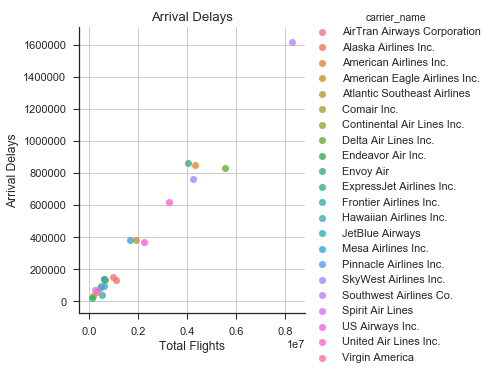

In [181]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Arrival_Delay',
          data=airline_df,
          fit_reg=False,
          hue='carrier_name',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Arrival Delays")
plt.title("Arrival Delays")
plt.savefig("Figure101.png")
plt.show()

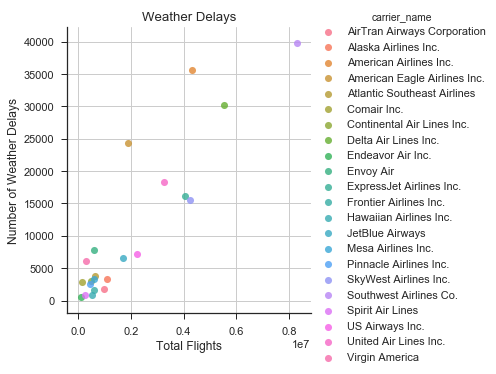

In [182]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Weather_Delay',
          data=airline_df,
          fit_reg=False,
          hue='carrier_name',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Number of Weather Delays")
plt.title("Weather Delays")
plt.savefig("Figure102.png")
plt.show()

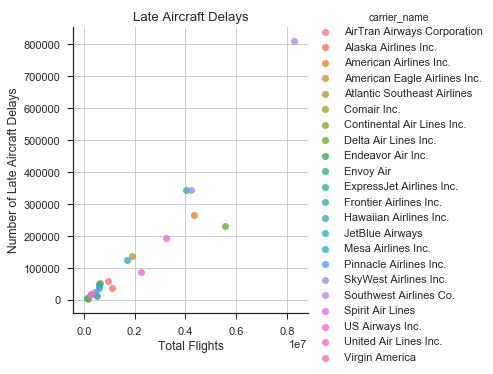

In [183]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Late_Aircraft_Delay',
          data=airline_df,
          fit_reg=False,
          hue='carrier_name',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Number of Late Aircraft Delays")
plt.title("Late Aircraft Delays")
plt.savefig("Figure103.png")
plt.show()

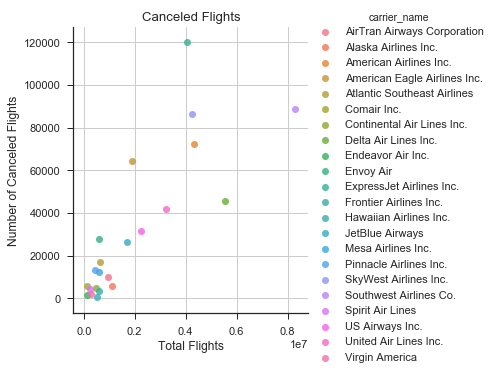

In [184]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Cancelled',
          data=airline_df,
          fit_reg=False,
          hue='carrier_name',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Number of Canceled Flights")
plt.title("Canceled Flights")
plt.savefig("Figure104.png")
plt.show()

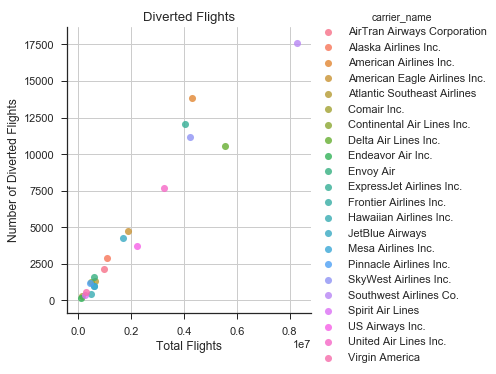

In [185]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Diverted',
          data=airline_df,
          fit_reg=False,
          hue='carrier_name',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Number of Diverted Flights")
plt.title("Diverted Flights")
plt.savefig("Figure105.png")
plt.show()

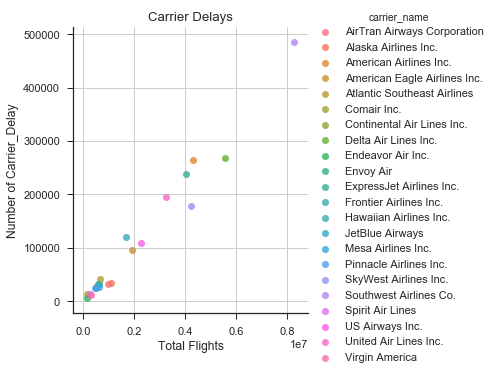

In [186]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Carrier_Delay',
          data=airline_df,
          fit_reg=False,
          hue='carrier_name',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Number of Carrier_Delay")
plt.title("Carrier Delays")
plt.savefig("Figure106.png")
plt.show()

In [187]:
airline_df.describe()

,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted
count,22,22,22,22,22,22,22
mean,1920827,356245,103250,10553,132617,31220,4538
std,2157140,408212,122320,11970,185624,34383,5195
min,119950,17163,5361,496,2724,759,186
25%,490586,84319,24841,2594,19977,5064,967
50%,808461,135735,33508,4909,51686,15044,1840
75%,2995753,559816,162866,15952,179403,44672,6922
max,8287375,1618890,485466,39800,808602,120058,17623


In [188]:
airport_totals = pd.DataFrame(flights.groupby('airport')['carrier_name', 'arr_flights', 'Arrival_Delay', 'Carrier_Delay', 'Weather_Delay', 'Late_Aircraft_Delay', 'Cancelled', 'Diverted'].sum())
airport_df = airport_totals.reset_index()
airport_df.head()

,airport,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted
0,ABE,20421,4061,1584,104,1410,548,68
1,ABI,15691,3161,1244,376,1012,472,13
2,ABQ,191260,37556,13903,786,16735,1476,315
3,ABR,3599,366,140,11,113,58,9
4,ABY,7034,1340,579,21,536,86,15


In [189]:
airport_df_largest = airport_df.query('arr_flights>500000')
airport_size_df = airport_df_largest.reset_index()
airport_size_df.airport = airport_size_df.airport.astype(str)
del airport_size_df['index']
airport_size_df.head()

,airport,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted
0,ATL,2732074,442929,106310,11961,165434,34580,5582
1,BOS,787691,160941,43976,4742,53561,16392,873
2,BWI,694963,122721,32936,4478,52942,10589,1737
3,CLT,871742,138149,37300,3724,43058,12571,1350
4,DCA,527286,95601,28179,3475,29047,14642,1461


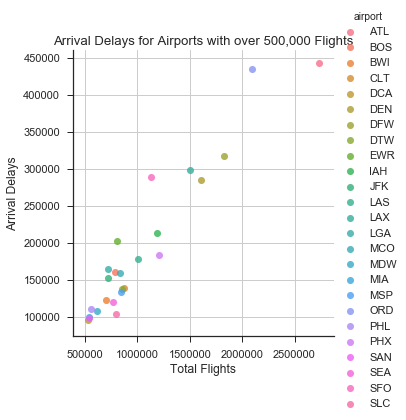

In [190]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Arrival_Delay',
          data=airport_size_df,
          fit_reg=False,
          hue='airport',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Arrival Delays")
plt.title("Arrival Delays for Airports with over 500,000 Flights")
plt.savefig("Figure201.png")
plt.show()

In [191]:
year_totals = pd.DataFrame(flights.groupby('Year')['arr_flights', 'Arrival_Delay', 'Carrier_Delay', 'Weather_Delay', 'Late_Aircraft_Delay', 'Cancelled', 'Diverted'].sum())
year_df = year_totals.reset_index()
year_df

,Year,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted
0,2010,6450117,1174884,339084,35854,420273,113255,15474
1,2011,6085281,1109872,313297,30963,410601,115978,14399
2,2012,6096762,1015158,302680,28799,381529,78862,12519
3,2013,6369482,1269277,353207,36817,492087,96012,14160
4,2014,5819811,1240528,356588,35035,478629,126984,14449
5,2015,5819079,1063439,323454,36037,385315,89884,15187
6,2016,5617658,964239,283192,28658,349140,65861,13652


In [192]:
year_df['arr_flights'] = year_df['arr_flights'].astype(int)
year_df['Arrival_Delay'] = year_df['Arrival_Delay'].astype(int)

year_df['Perc_Delay'] = (year_df['Arrival_Delay'] / year_df['arr_flights']) *100

year_df

,Year,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted,Perc_Delay
0,2010,6450117,1174884,339084,35854,420273,113255,15474,18
1,2011,6085281,1109872,313297,30963,410601,115978,14399,18
2,2012,6096762,1015158,302680,28799,381529,78862,12519,17
3,2013,6369482,1269277,353207,36817,492087,96012,14160,20
4,2014,5819811,1240528,356588,35035,478629,126984,14449,21
5,2015,5819079,1063439,323454,36037,385315,89884,15187,18
6,2016,5617658,964239,283192,28658,349140,65861,13652,17


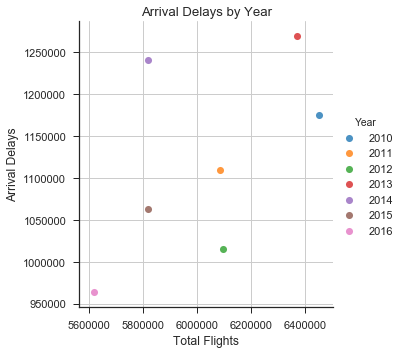

In [193]:
# Scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('arr_flights',
          'Arrival_Delay',
          data=year_df,
          fit_reg=False,
          hue='Year',
           scatter_kws={"marker": "o",
                      "s": 50})

plt.grid(True)
plt.xlabel("Total Flights")
plt.ylabel("Arrival Delays")
plt.title("Arrival Delays by Year")
plt.savefig("Figure01.png")
plt.show()

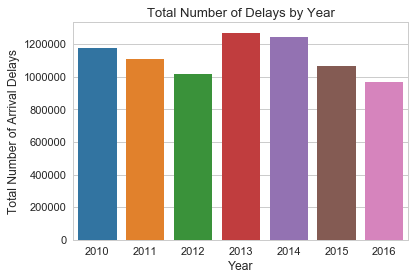

In [194]:
# Barplot
sns.set_style("whitegrid")
ax = sns.barplot(x="Year", y="Arrival_Delay", data=year_df)
plt.xlabel("Year")
plt.ylabel("Total Number of Arrival Delays")
plt.title("Total Number of Delays by Year")
plt.savefig("Figure001.png")
plt.show()

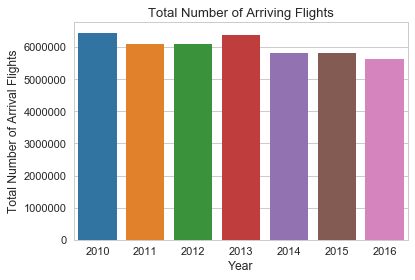

In [195]:
# Barplot
sns.set_style("whitegrid")
ax = sns.barplot(x="Year", y="arr_flights", data=year_df)
plt.xlabel("Year")
plt.ylabel("Total Number of Arrival Flights")
plt.title("Total Number of Arriving Flights")
plt.savefig("Figure002.png")
plt.show()

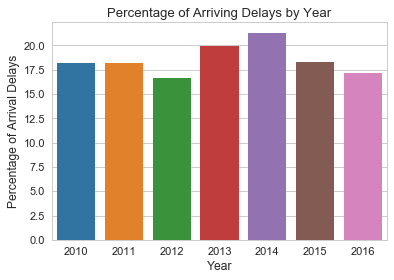

In [196]:
# Barplot
sns.set_style("whitegrid")
ax = sns.barplot(x="Year", y="Perc_Delay", data=year_df)
plt.xlabel("Year")
plt.ylabel("Percentage of Arrival Delays")
plt.title("Percentage of Arriving Delays by Year")
plt.savefig("Figure003.png")
plt.show()

In [197]:
year_airline_totals = pd.DataFrame(flights.groupby('carrier_name')['arr_flights', 'Arrival_Delay', 'Carrier_Delay', 'Weather_Delay', 'Late_Aircraft_Delay', 'Cancelled', 'Diverted'].sum())
year_airline_df = year_airline_totals.reset_index()
year_airline_df

,carrier_name,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted
0,AirTran Airways Corporation,969156,148611,31783,1838,58498,9817,2107
1,Alaska Airlines Inc.,1093046,131574,34115,3385,37198,5907,2867
2,American Airlines Inc.,4320429,847186,264836,35633,265930,72234,13847
3,American Eagle Airlines Inc.,1898148,380804,96412,24400,137774,64165,4718
4,Atlantic Southeast Airlines,647766,129619,42267,3785,54388,16932,1343
5,Comair Inc.,147633,33739,13096,2935,2724,5645,301
6,Continental Air Lines Inc.,484589,94415,26624,3062,17273,4871,1282
7,Delta Air Lines Inc.,5545855,832902,268459,30234,233082,45635,10546
8,Endeavor Air Inc.,119950,17163,5361,496,5146,1691,186
9,Envoy Air,587344,135894,32900,7804,48984,27823,1573


In [198]:
year_airline_df['arr_flights'] = year_airline_df['arr_flights'].astype(int)
year_airline_df['Arrival_Delay'] = year_airline_df['Arrival_Delay'].astype(int)

year_airline_df['Perc_Delay'] = (year_airline_df['Arrival_Delay'] / year_airline_df['arr_flights']) *100

year_airline_df

,carrier_name,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted,Perc_Delay
0,AirTran Airways Corporation,969156,148611,31783,1838,58498,9817,2107,15
1,Alaska Airlines Inc.,1093046,131574,34115,3385,37198,5907,2867,12
2,American Airlines Inc.,4320429,847186,264836,35633,265930,72234,13847,20
3,American Eagle Airlines Inc.,1898148,380804,96412,24400,137774,64165,4718,20
4,Atlantic Southeast Airlines,647766,129619,42267,3785,54388,16932,1343,20
5,Comair Inc.,147633,33739,13096,2935,2724,5645,301,23
6,Continental Air Lines Inc.,484589,94415,26624,3062,17273,4871,1282,19
7,Delta Air Lines Inc.,5545855,832902,268459,30234,233082,45635,10546,15
8,Endeavor Air Inc.,119950,17163,5361,496,5146,1691,186,14
9,Envoy Air,587344,135894,32900,7804,48984,27823,1573,23


In [199]:
top10_airline = year_airline_df.query('Arrival_Delay>140000')
top10_airline_df = top10_airline.reset_index()
del top10_airline_df['index']
top10_airline_df.carrier_name = top10_airline_df.carrier_name.astype(str)
top10_airline_df

,carrier_name,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Late_Aircraft_Delay,Cancelled,Diverted,Perc_Delay
0,AirTran Airways Corporation,969156,148611,31783,1838,58498,9817,2107,15
1,American Airlines Inc.,4320429,847186,264836,35633,265930,72234,13847,20
2,American Eagle Airlines Inc.,1898148,380804,96412,24400,137774,64165,4718,20
3,Delta Air Lines Inc.,5545855,832902,268459,30234,233082,45635,10546,15
4,ExpressJet Airlines Inc.,4036902,859585,238087,16100,344256,120058,12070,21
5,JetBlue Airways,1687451,381454,119354,6566,126631,26560,4291,23
6,SkyWest Airlines Inc.,4238423,762086,177370,15509,343503,86427,11172,18
7,Southwest Airlines Co.,8287375,1618890,485466,39800,808602,88838,17623,20
8,US Airways Inc.,2246049,370891,108333,7234,87152,31719,3738,17
9,United Air Lines Inc.,3245654,619270,195630,18289,193279,41782,7656,19


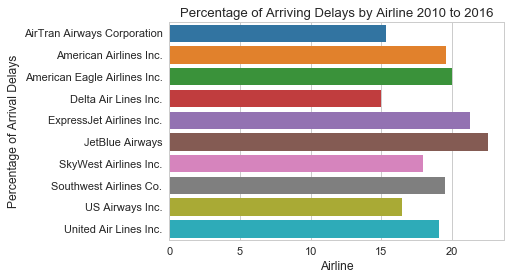

In [200]:
# Barplot
sns.set_style("whitegrid")
ax = sns.barplot(x="Perc_Delay", y="carrier_name", data=top10_airline_df)
plt.xlabel("Airline")
plt.ylabel("Percentage of Arrival Delays")
plt.title("Percentage of Arriving Delays by Airline 2010 to 2016")
plt.savefig("Figure004.png")
plt.show()